In [10]:
import os
import sys
import time
import numpy as np
import imgaug
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval
from pycocotools import mask as maskUtils
import zipfile
import urllib.request
import shutil

# Root directory of the project
ROOT_DIR = os.path.abspath("./")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn.config import Config
from mrcnn import model as modellib, utils

# Path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")

# Directory to save logs and model checkpoints, if not provided
# through the command line argument --logs
DEFAULT_LOGS_DIR = os.path.join(ROOT_DIR, "logs")
DEFAULT_DATASET_YEAR = "2014"

In [11]:
class InferenceConfig(Config):
    NAME="inf"
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    NUM_CLASSES = 80 + 1

inf_config = InferenceConfig()
inf_config.display()

inf_model = modellib.MaskRCNN(mode="inference",
                          config=inf_config,
                          model_dir=DEFAULT_LOGS_DIR)

model_path = COCO_MODEL_PATH

# Load weights
print("Loading weights ", model_path)
inf_model.load_weights(model_path, by_name=True)


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                93
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0, 'mrcnn_class_loss': 1.0, 'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

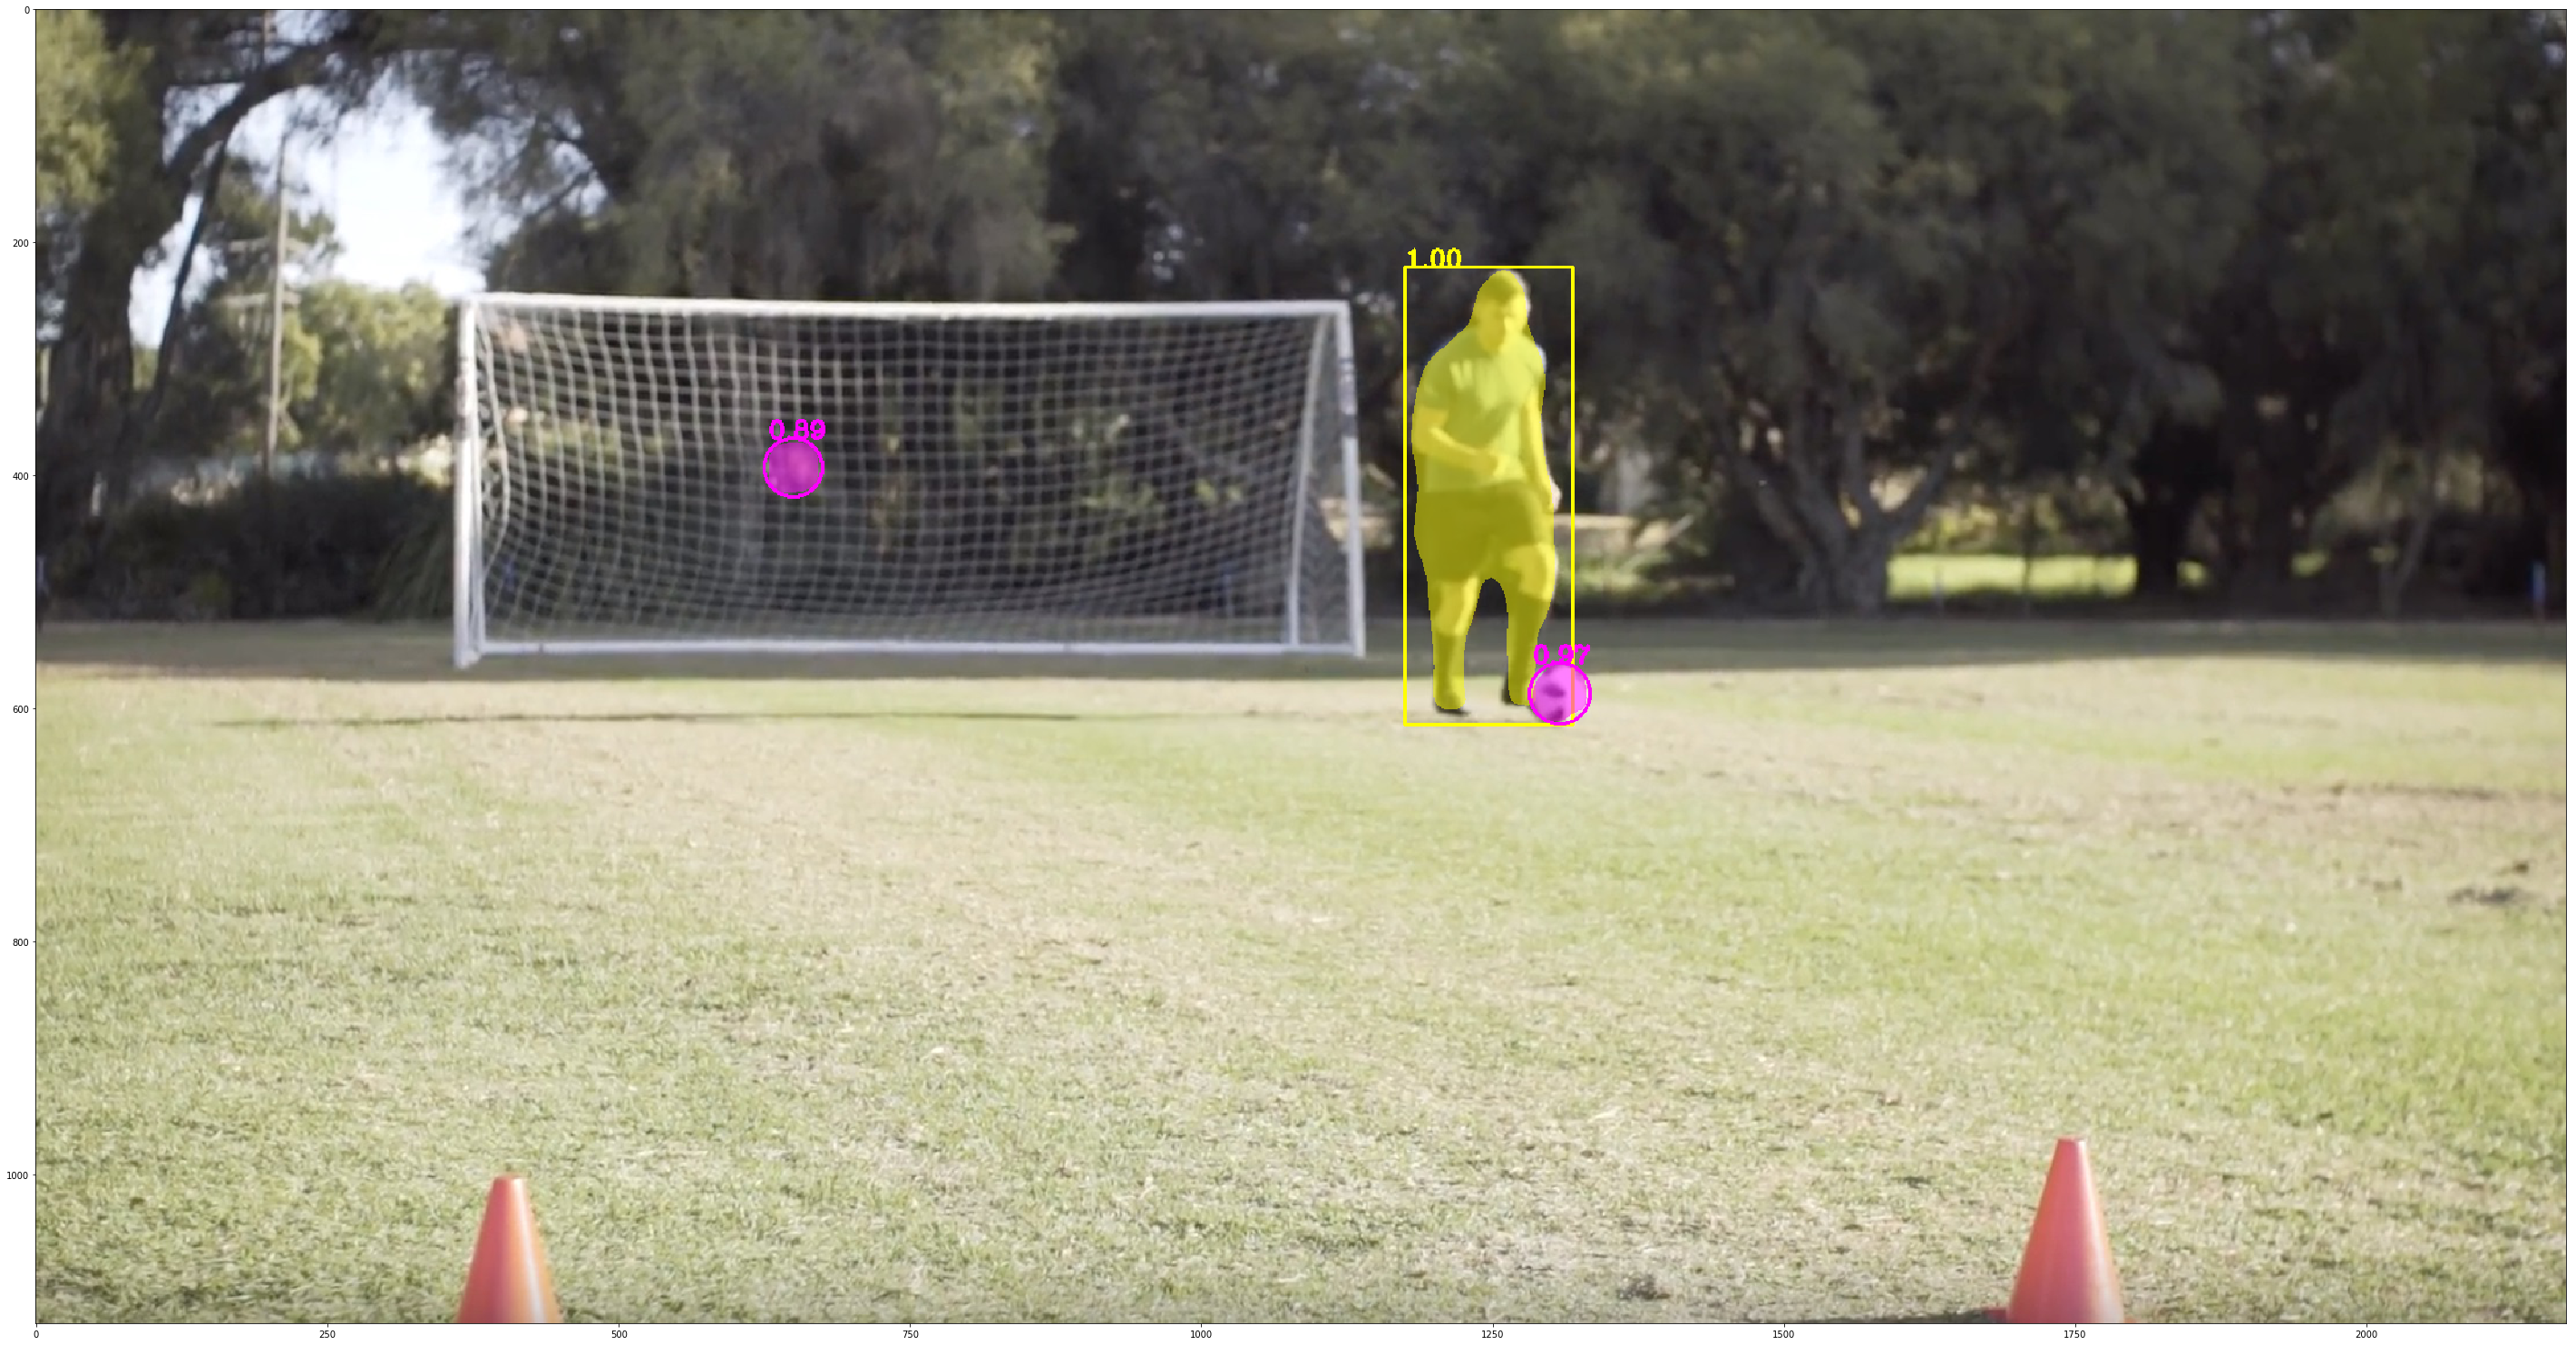

In [16]:
import skimage.io
import matplotlib
import matplotlib.pyplot as plt

import cv2
import numpy as np

from form.utils import *

IMAGE_DIR = os.path.join(ROOT_DIR, "images")


file_names = next(os.walk(IMAGE_DIR))[2]
image = skimage.io.imread(os.path.join(IMAGE_DIR, 'jamie.jpg'))

# Run Mask RCNN inference.
results = inf_model.detect([image], verbose=0)[0]

# Visualize results
fig = plt.figure(figsize = (50,50))
img = display_instances(image, *filter_results(results))
plt.imshow(img)